In [4]:
using LinearAlgebra

## Building the Matrix 

In [9]:
#help Tridiagonal

In [10]:
N  = 4 # mesh with 4 elements
h = 1/N # mesh width 

0.25

In [11]:
e = ones(N+1)

5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [12]:
A = Tridiagonal(e[1:end-1], -2*e, e[1:end-1]) # for th interior nodes 

5×5 Tridiagonal{Float64, Vector{Float64}}:
 -2.0   1.0    ⋅     ⋅     ⋅ 
  1.0  -2.0   1.0    ⋅     ⋅ 
   ⋅    1.0  -2.0   1.0    ⋅ 
   ⋅     ⋅    1.0  -2.0   1.0
   ⋅     ⋅     ⋅    1.0  -2.0

In [13]:
A[1,1] = 1; A[1,2] = 0; # Dirichlet in the left end point  

In [14]:
A[end,end] = 1/h; A[end, end-1] = -1/h; # Neumann in right end point  

In [15]:
display(A)

5×5 Tridiagonal{Float64, Vector{Float64}}:
 1.0   0.0    ⋅     ⋅    ⋅ 
 1.0  -2.0   1.0    ⋅    ⋅ 
  ⋅    1.0  -2.0   1.0   ⋅ 
  ⋅     ⋅    1.0  -2.0  1.0
  ⋅     ⋅     ⋅   -4.0  4.0

In [16]:
function build_matrix(N)
    h = 1/N # mesh width
    e = ones(N+1) # diagonal vector 
    A = Tridiagonal(e[1:end-1], -2*e, e[1:end-1]) # for th interior nodes
    A = 1/(h*h)*A 
    A[1,1] = 1; A[1,2] = 0; # Dirichlet in the left end point
    A[end,end] = 1/h; A[end, end-1] = -1/h; # Neumann in right end point
    return A 
end 

build_matrix (generic function with 1 method)

In [17]:
build_matrix(4)

5×5 Tridiagonal{Float64, Vector{Float64}}:
  1.0    0.0     ⋅      ⋅     ⋅ 
 16.0  -32.0   16.0     ⋅     ⋅ 
   ⋅    16.0  -32.0   16.0    ⋅ 
   ⋅      ⋅    16.0  -32.0  16.0
   ⋅      ⋅      ⋅    -4.0   4.0

## Build the Right-Hand Side Function  

In [27]:
function wave_system!(du,u,p,t)
    -A*u  
    u[1] = 
end

wave_system! (generic function with 1 method)

## Solve the ODE problem 

In [28]:
using DifferentialEquations

In [32]:
u0 = ones(N+1)
v0 = zeros(N+1)

tspan = (0.0,1.) # (start time, end time)               

prob = SecondOrderODEProblem(wave_system!,v0,u0,tspan) # problem definition 

sol = solve(prob, AutoVern7(Rodas5()), reltol = 1e-8, abstol = 1e-8, save_everystep = true); # problem solve

## Post Processing 

In [33]:
using Plots 

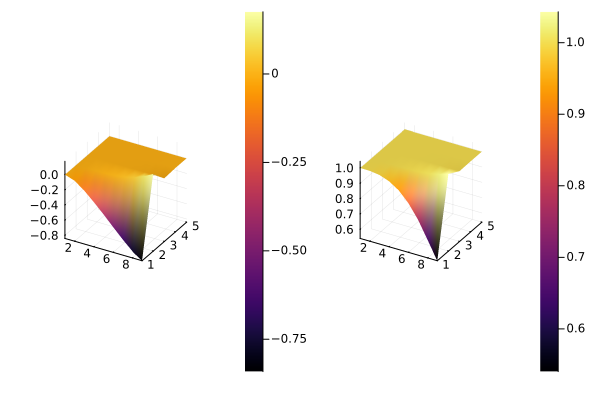

In [34]:
velind = 1:N+1; posind = N+2:2*(N+1); 
Nt = length(sol.t)
V  = sol[velind,:]
p1 = surface(V)
U  = sol[posind,:]
p2 = surface(U)
plot(p1, p2, layout= (1,2))